>  Dana jest tablica zawierająca $ n $ liczb z zakresu $ [0, n^2-1] $. Napisz algorytm, który posortuje taką tablicę w czasie $ O(n) $.

### Omówienie algorytmu

###### Wstępne rozważania:

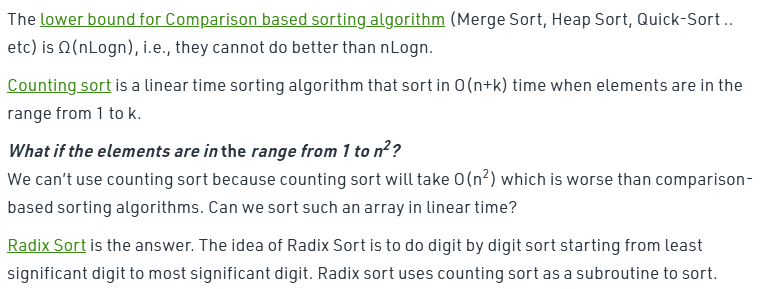
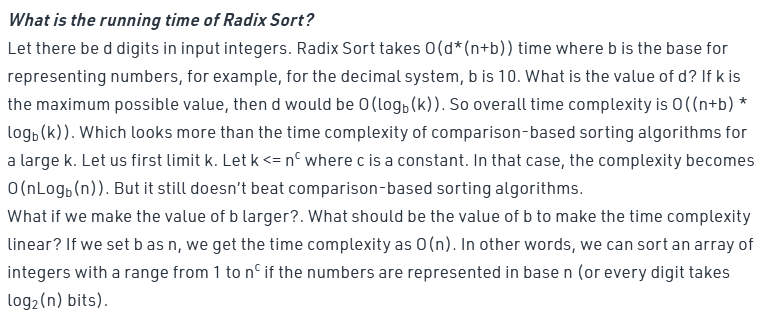

Powyższy opis algorytmu Radix Sort zaczerpnięty ze strony internetowej:
##### https://www.geeksforgeeks.org/radix-sort/
Pokazuje idealnie zastosowanie algorytmu Radix Sort. Ponieważ jego dokładna złożoność czasowa to $ O(d \cdot (n + b)) = O(log_b(k) \cdot* (n + b)) $, gdzie $ d = log_b(k) $ - maksymalna liczba znaków, jakie są wymagane do reprezentowania sortownych wartości w systemie liczbowym o podstawie $ b $, $ b $ jest podstawą systemu liczbowego, $ k $ - największą wartością w sortowanym zakresie, $ n $ - dlugością sortowanej tablicy,

Zauważmy, że abyśmy osiągnęli złożoność liniową, musimy mieć pewność, że liczba cyfr sortowanych przez nas liczb nie zależy od $ n $ (tzn. $ d \neq n $, jest stała), ponieważ w przeciwnym wypadku byśmy uzyskali złożoność większą niż $ O(n) $. Wiemy, że liczby należą do zakresu $ [0, n^2 - 1] $ oraz, że mamy $ n $ liczb, więc możemy zauważyć, że największą wartością moze być $ k = n^2 - 1 $. Ponieważ pragniemy aby $ d = log_b(k) = const. $ oraz wiemy, że w najgorszym przypadku $ k = n^2 - 1 $, za podstawę systemu liczbowego najlepiej przyjąć $ n $. Wynika to z faktu, iż wówczas: $ d = log_n(k) = log_n(n^2 - 1) < log_n(n^2) = 2log_n(n) = 2 = const. $. Zatem całkowita złożoność obliczeniowa wyniesie wówczas: $ O(2 \cdot (n + n)) = O(4n) = O(n) $.

### Implementacja algorytmu

In [1]:
def radix_sort(arr, base=10):
    if arr:
        # Store the greatest value
        max_val = _max(arr)
        
        digit_place = 1
        while max_val >= digit_place:
            _counting_sort(arr, base, digit_place)
            digit_place *= base


def _counting_sort(arr, base, digit_place):
    # Allocate memory for required temporary arrays
    counts = [0] * base
    temp = [None] * len(arr)
    # Count digits repetitions
    for val in arr:
        digit = (val // digit_place) % base
        counts[digit] += 1
    # Modify the counts array to indicate how many digits are not greater than the current one
    for i in range(1, base):
        counts[i] += counts[i-1]
    # Rewrite values to the temp sorted array
    for i in range(len(arr)-1, -1, -1):
        digit = (arr[i] // digit_place) % base
        counts[digit] -= 1
        temp[counts[digit]] = arr[i]
    # Rewrite sorted values to the initial array
    for i in range(len(temp)):
        arr[i] = temp[i]
        
        
def _max(arr):
    if arr:
        max_val = arr[0]
        for i in range(1, len(arr)):
            if arr[i] > max_val:
                max_val = arr[i]
        return max_val
    else:
        return None

###### Kilka testów

In [2]:
import random

n = 100
rand_lst = [random.randint(0, n**2 - 1) for _ in range(n)]
print('\nInput:', rand_lst)
sorted_lst = sorted(rand_lst)
radix_sort(rand_lst, n)
print('\nExpected:', sorted_lst)
print('\nResult:', rand_lst)
print(f'\nAn algorithm is {"CORRECT" if sorted_lst == rand_lst else "WRONG"}')


Input: [8173, 3019, 1257, 5558, 1578, 1070, 1862, 3323, 6892, 1612, 1225, 2178, 9447, 4971, 1828, 1038, 7383, 7431, 5888, 4325, 5272, 1147, 2880, 1921, 9154, 9397, 8041, 6227, 7171, 4767, 1782, 8107, 2541, 2641, 2076, 462, 5813, 6025, 3230, 8060, 8753, 7015, 3306, 7594, 1654, 6543, 5910, 5198, 9417, 6469, 5403, 863, 5328, 2693, 5835, 3491, 639, 1231, 5177, 952, 1634, 3802, 9045, 1952, 6316, 3884, 8045, 3799, 7613, 3679, 4861, 6555, 6698, 6722, 4824, 2257, 3262, 6098, 9408, 8306, 2777, 529, 3730, 2686, 7559, 3283, 3695, 7234, 2997, 567, 7735, 8800, 4342, 8641, 3569, 9310, 5784, 9038, 9673, 1797]

Expected: [462, 529, 567, 639, 863, 952, 1038, 1070, 1147, 1225, 1231, 1257, 1578, 1612, 1634, 1654, 1782, 1797, 1828, 1862, 1921, 1952, 2076, 2178, 2257, 2541, 2641, 2686, 2693, 2777, 2880, 2997, 3019, 3230, 3262, 3283, 3306, 3323, 3491, 3569, 3679, 3695, 3730, 3799, 3802, 3884, 4325, 4342, 4767, 4824, 4861, 4971, 5177, 5198, 5272, 5328, 5403, 5558, 5784, 5813, 5835, 5888, 5910, 6025, 6098, 6